<a href="https://colab.research.google.com/github/gennai/2024_hackaton_Bicocca/blob/main/testYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
driveDir = "/content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset"
train_dir = "train"
train_dir = os.path.join(driveDir, train_dir)

test_dir = "test"
test_dir = os.path.join(driveDir, test_dir)

print(os.listdir(test_dir))
categories = ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

size_threshold = (10,10)
valid_extensions=('.jpg', '.png', '.jpeg')


['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']


#DataAnalysis

In [42]:
def is_image_corrupt(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return True
        return False
    except:
        return True

def is_image_below_threshold(img_path):
    img = cv2.imread(image_path)
    if img.shape <= size_threshold:
        print(img.shape)
        return True
    return False


for each_category in categories:
    folder_path = os.path.join(test_dir, each_category)
    for each_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, each_file)
        if os.path.isfile(image_path) and each_file.lower().endswith(valid_extensions):
            if is_image_corrupt(image_path) or is_image_below_threshold(image_path):
                os.remove(image_path)
                print(f"Removed corrupt image: {each_file}")

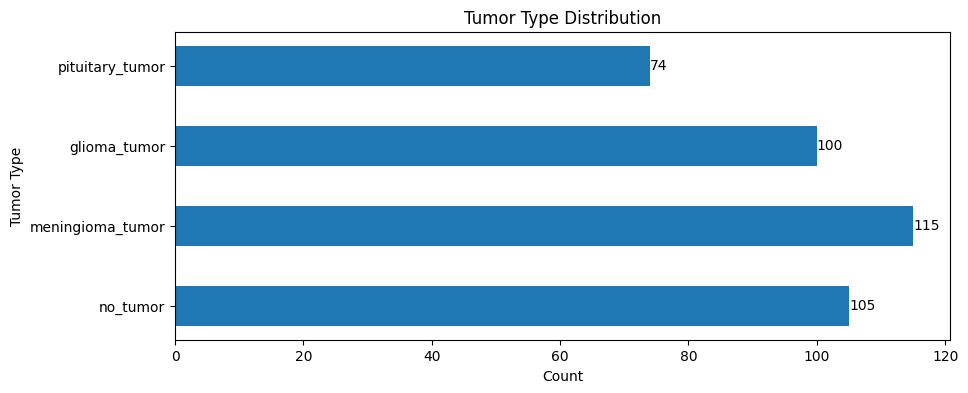

In [45]:
import matplotlib.pyplot as plt
category_count = {}

for each_category in categories:
    folder_path = os.path.join(test_dir, each_category)
    valid_images = [file for file in os.listdir(folder_path) if file.lower().endswith(valid_extensions)]
    category_count[each_category] = len(valid_images)

fig, ax = plt.subplots(figsize=(10, 4))

# Bar chart
bar_plot = plt.barh(list(category_count.keys()), list(category_count.values()), 0.5)
plt.title('Tumor Type Distribution')
plt.xlabel('Count')
plt.ylabel('Tumor Type')
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(list(category_count.values())[i]), ha='left', va='center')

plt.show()

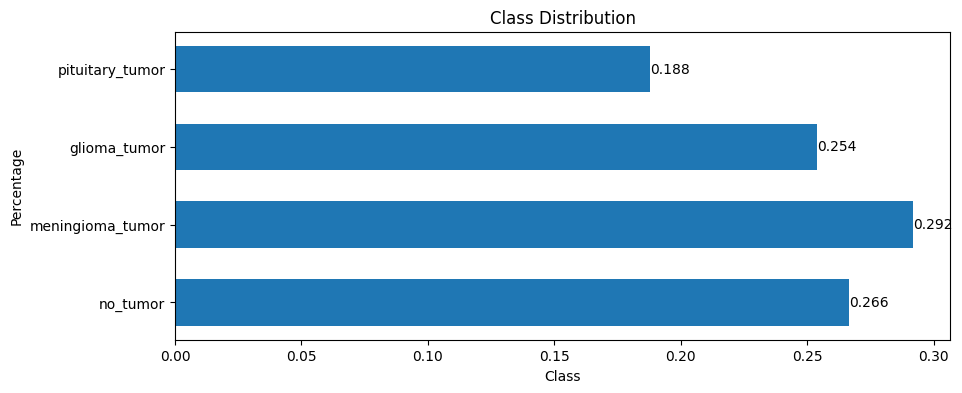

In [46]:
sample_size = sum(category_count.values())

class_dist = {key : val/sample_size for key, val in category_count.items()}


fig, ax = plt.subplots(figsize=(10, 4))


# Bar chart
bar_plot = plt.barh(list(class_dist.keys()), list(class_dist.values()), 0.6)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(round(list(class_dist.values())[i], 3)), ha='left', va='center')

plt.show()


#DataVisualizaion

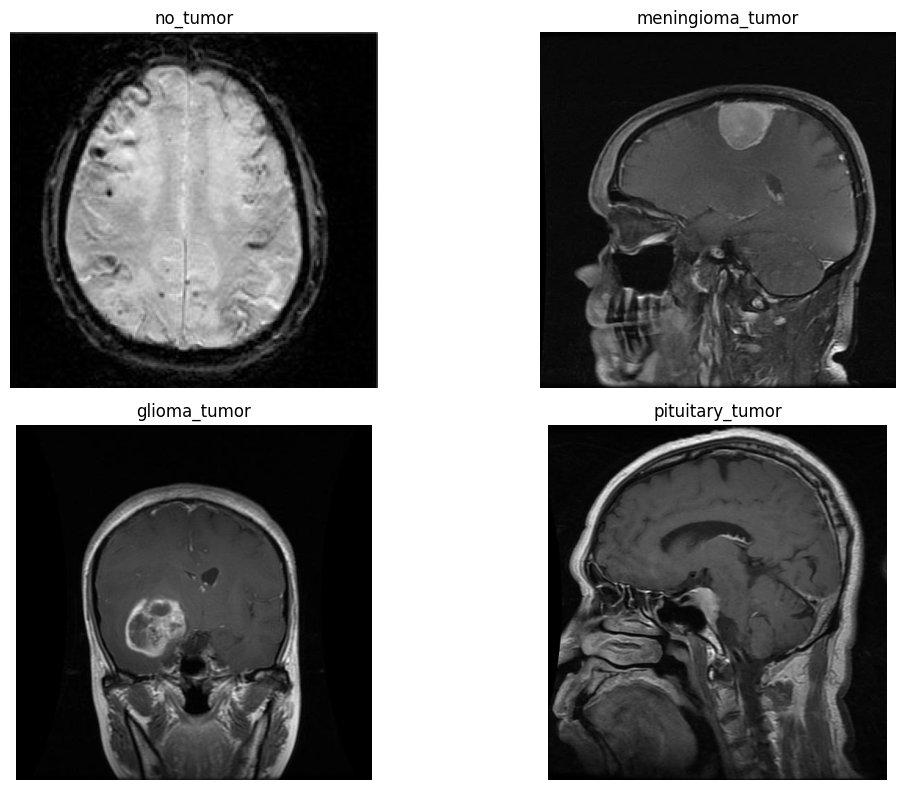

In [47]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(test_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    if not image_path.lower().endswith(valid_extensions):
        continue
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

#Train the model

In [19]:
from ultralytics import YOLO

model = YOLO('yolov8m-cls.pt')

# train/pre-tuned the model on our dataset
model.train(data=driveDir, epochs=3)
model.val()

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/train... 2360 images, 0 corrupt: 100%|██████████| 2360/2360 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/test... 394 images, 0 corrupt: 100%|██████████| 394/394 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train12
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 73.41it/s]

                   all      0.609          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 74.82it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 67.84it/s]

                   all      0.766          1



3 epochs completed in 0.009 hours.
Optimizer stripped from runs/classify/train12/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train12/weights/best.pt, 31.7MB

Validating runs/classify/train12/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/train... found 2360 images in 4 classes ✅ 
val: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val... found 394 images in 4 classes ✅ 
test: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/test... found 394 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 14.69it/s]


                   all      0.766          1
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train12
Results saved to runs/classify/train12
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/train... found 2360 images in 4 classes ✅ 
val: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val... found 394 images in 4 classes ✅ 
test: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/test... found 394 images in 4 classes ✅ 


val: Scanning /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val... 394 images, 0 corrupt: 100%|██████████| 394/394 [00:33<00:00, 11.80it/s]

val: New cache created: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 25/25 [00:01<00:00, 13.47it/s]


                   all      0.766          1
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train122


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7afcb68e8550>
curves: []
curves_results: []
fitness: 0.8832487165927887
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7664974331855774, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8832487165927887}
save_dir: PosixPath('runs/classify/train122')
speed: {'preprocess': 0.0655052020465057, 'inference': 2.8253194644366424, 'loss': 0.0007787936835119567, 'postprocess': 0.0007382504225987469}
task: 'classify'
top1: 0.7664974331855774
top5: 1.0

In [27]:
metrics = model.val(save_json=True, project=driveDir, name="results")

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
train: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/train... found 2360 images in 4 classes ✅ 
val: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val... found 394 images in 4 classes ✅ 
test: /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/test... found 394 images in 4 classes ✅ 


val: Scanning /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/val... 394 images, 0 corrupt: 100%|██████████| 394/394 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 25/25 [00:01<00:00, 13.97it/s]


                   all      0.766          1
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/drive/My Drive/KaggleTumorsDataset/brain-tumor-classification-dataset/results


In [26]:
!ls "/content/drive/MyDrive"

 2022-02-PRIN-XAI
 2022_09_30_WP4_news.gslides
'2022-masterclass (1).gslides'
 2022-masterclass.gslides
 2023_07_11_ReportGPUCourse.gslides
'2024 L1 - Candidate feedback.gsheet'
 29.1.2020.gslides
'Allegato-1-Primo-Verbale-Scientifico_Gennai (1).pdf'
'Allegato-1-Secondo-Verbale-Scientifico.docx (2).pdf'
'Allegato-2-Primo-Verbale-Scientifico.docx (3).pdf'
'Allegato-2-Secondo-Verbale-Scientifico.docx (1).pdf'
'Allegato-3a-Primo-Verbale-Scientifico_Biassoni.docx (2).pdf'
'Allegato-3b-Primo-Verbale-Scientifico_Gennai.docx (3).pdf'
'Allegato-3-Primo-Verbale-Scientifico (1).docx'
 Allegato-3-Primo-Verbale-Scientifico.docx
'Allegato-3-Primo-Verbale-Scientifico.docx (2).pdf'
'Allegato-3-Secondo-Verbale-Scientifico.docx (2).pdf'
 Allegato-4a-Secondo-Verbale-Scientifico.docx.pdf
 Allegato-4b-Secondo-Verbale-Scientifico.docx.pdf
'Allegato-4-Primo-Verbale-Scientifico.docx (3).pdf'
'Allegato-5-Primo-Verbale-Scientifico.docx (3).pdf'
'Allegato-6-Primo-Verbale-Scientifico (1).gdoc'
'Allegato-6-Primo-